# HSV colorspace

### Import resources

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in RGB image

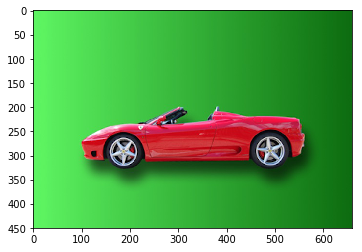

In [54]:
# Read in the image
image = mpimg.imread('images/car_green_screen2.jpg')

plt.imshow(image)

### RGB threshold 

Visualize the green threshold you defined in the previous, consistent green color case.

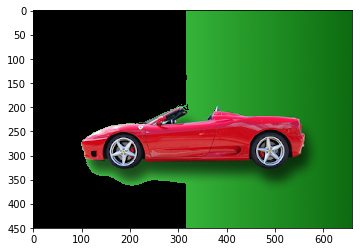

In [55]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

plt.imshow(masked_image)
plt.show()

### Convert to HSV

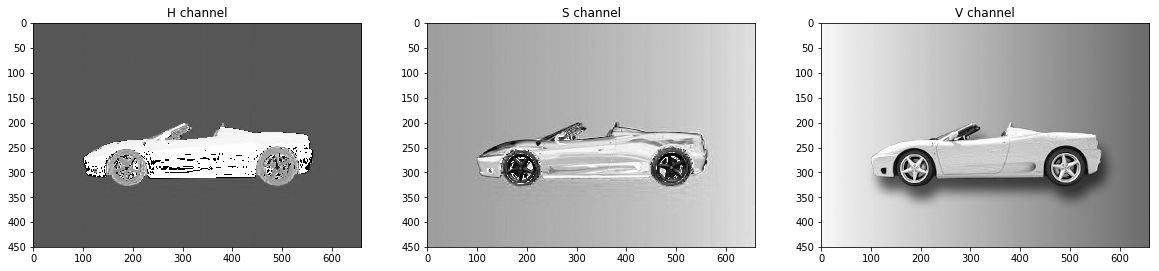

In [56]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

### TODO: Mask the green area using HSV color space

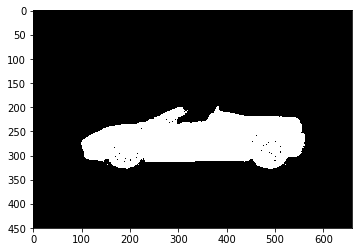

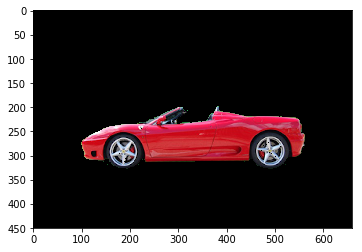

In [57]:
## TODO: Define the color selection boundaries in HSV values

## TODO: Define the masked area and mask the image
# Don't forget to make a copy of the original image to manipulate

lower_green_hue = np.array([52]) 
upper_green_hue = np.array([66])

# Define the masked area
hue_mask = cv2.inRange(h, lower_green_hue, upper_green_hue)

hue_masked_image = np.copy(h)

# Convert image to monotone image (255 = car, 0 = background)
hue_masked_image[hue_mask != 0] = [0]
hue_masked_image[hue_mask == 0] = [255]

plt.imshow(hue_masked_image, cmap="gray", vmin=0, vmax=255)
plt.show()

# Mask the image to let the car show through
masked_image = np.copy(image)
masked_image[hue_masked_image == 0] = [0, 0, 0]
plt.imshow(masked_image)
plt.show()

660 x 450


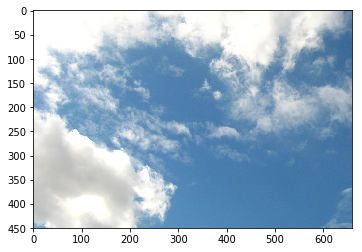

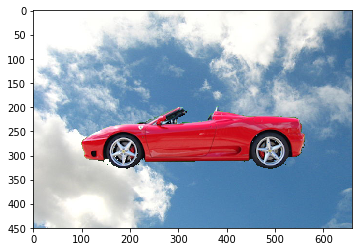

In [58]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

out_height = masked_image.shape[0]
out_width = masked_image.shape[1]

print("{} x {}".format(out_width, out_height))

# Resize the image
scale_x = float(out_width) / background_image.shape[1]
scale_y = float(out_height) / background_image.shape[0]
scale = scale_x

if scale_x>1.0 or scale_y>1.0:
    scale = scale_x if scale_x>scale_y else scale_y
    
if scale>1.0:
    background_image = cv2.resize(background_image, background_image.shape*scale) 
    
background_image = background_image[0:out_height, 0:out_width]

# Show cropped and resized original
plt.imshow(background_image)
plt.show()

# Add masked car
final_image = background_image.copy()
final_image[hue_masked_image != 0] = [0, 0, 0]
final_image = final_image + masked_image

plt.imshow(final_image)
plt.show()